In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

랜덤 포레스트 정확도: 0.9561


In [12]:
rf_clf1 = RandomForestClassifier(n_estimators = 500,
                                max_depth = 6,
                                min_samples_leaf = 8,
                                min_samples_split = 5,
                                random_state=0)

rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

랜덤 포레스트 정확도: 0.9386


In [13]:
X_train.shape

(455, 30)

In [16]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators':[100],
            'max_depth' : [6, 8, 10, 12], 
            'min_samples_leaf' : [8, 12, 18 ],
            'min_samples_split' : [8, 16, 20]}

rf_clf1 = RandomForestClassifier(random_state = 0)

grid_cv = GridSearchCV(rf_clf1, param_grid= params, cv = 3)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [17]:
pred = grid_cv.predict(X_test)
accuracy_score(pred, y_test)

0.9385964912280702

In [20]:
model = grid_cv.best_estimator_
model.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [21]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [22]:
grid_cv.best_score_

0.9494887881956547

In [23]:
rf_clf.feature_importances_

array([0.03278919, 0.01514508, 0.06962088, 0.04437244, 0.00453718,
       0.00487869, 0.06173446, 0.10413769, 0.00374702, 0.00315282,
       0.01996887, 0.00364285, 0.01578267, 0.04108457, 0.00468091,
       0.00379866, 0.00402008, 0.00401681, 0.00520439, 0.0040683 ,
       0.11382906, 0.01373117, 0.1736531 , 0.0614656 , 0.00988109,
       0.01588499, 0.02413248, 0.1175149 , 0.01010107, 0.00942297])

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')


start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GBM 정확도: {gb_accuracy:.4f}')
print(f"GBM 수행 시간: {time.time() - start_time:.1f} 초 ")

GBM 정확도: 0.9561
GBM 수행 시간: 0.3 초 


In [25]:
import xgboost

In [26]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [27]:
dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features,
columns=dataset.feature_names)
cancer_df['target']= y_label


In [28]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X_features,
y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, 
test_size=0.1, random_state=156)


print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


In [29]:
4/5 * 1/10

0.08

In [30]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

params = { 'max_depth':3,
            'eta': 0.05,
            'objective':'binary:logistic',
            'eval_metric':'logloss'
            }

num_rounds = 400


In [31]:
dtr

In [32]:
# 또는 eval_list = [(dtr,'train'),(dval,'eval')] 
eval_list = [(dval,'eval')]

xgb_model = xgb.train(params = params , dtrain=dtr , 
                        num_boost_round=num_rounds , 
                        early_stopping_rounds=50, 
                        evals=eval_list )


[0]	eval-logloss:0.66183
[1]	eval-logloss:0.63609
[2]	eval-logloss:0.61144
[3]	eval-logloss:0.59204
[4]	eval-logloss:0.57329
[5]	eval-logloss:0.55037
[6]	eval-logloss:0.52929
[7]	eval-logloss:0.51534
[8]	eval-logloss:0.49718
[9]	eval-logloss:0.48154
[10]	eval-logloss:0.46990
[11]	eval-logloss:0.45474
[12]	eval-logloss:0.44229
[13]	eval-logloss:0.42961
[14]	eval-logloss:0.42065
[15]	eval-logloss:0.40958
[16]	eval-logloss:0.39887
[17]	eval-logloss:0.39050
[18]	eval-logloss:0.38254
[19]	eval-logloss:0.37393
[20]	eval-logloss:0.36789
[21]	eval-logloss:0.36017
[22]	eval-logloss:0.35421
[23]	eval-logloss:0.34683
[24]	eval-logloss:0.34111
[25]	eval-logloss:0.33634
[26]	eval-logloss:0.33082
[27]	eval-logloss:0.32675
[28]	eval-logloss:0.32099
[29]	eval-logloss:0.31671
[30]	eval-logloss:0.31277
[31]	eval-logloss:0.30882
[32]	eval-logloss:0.30437
[33]	eval-logloss:0.30103
[34]	eval-logloss:0.29794
[35]	eval-logloss:0.29499
[36]	eval-logloss:0.29295
[37]	eval-logloss:0.29043
[38]	eval-logloss:0.28

In [33]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]


In [34]:
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, y_test)

0.956140350877193

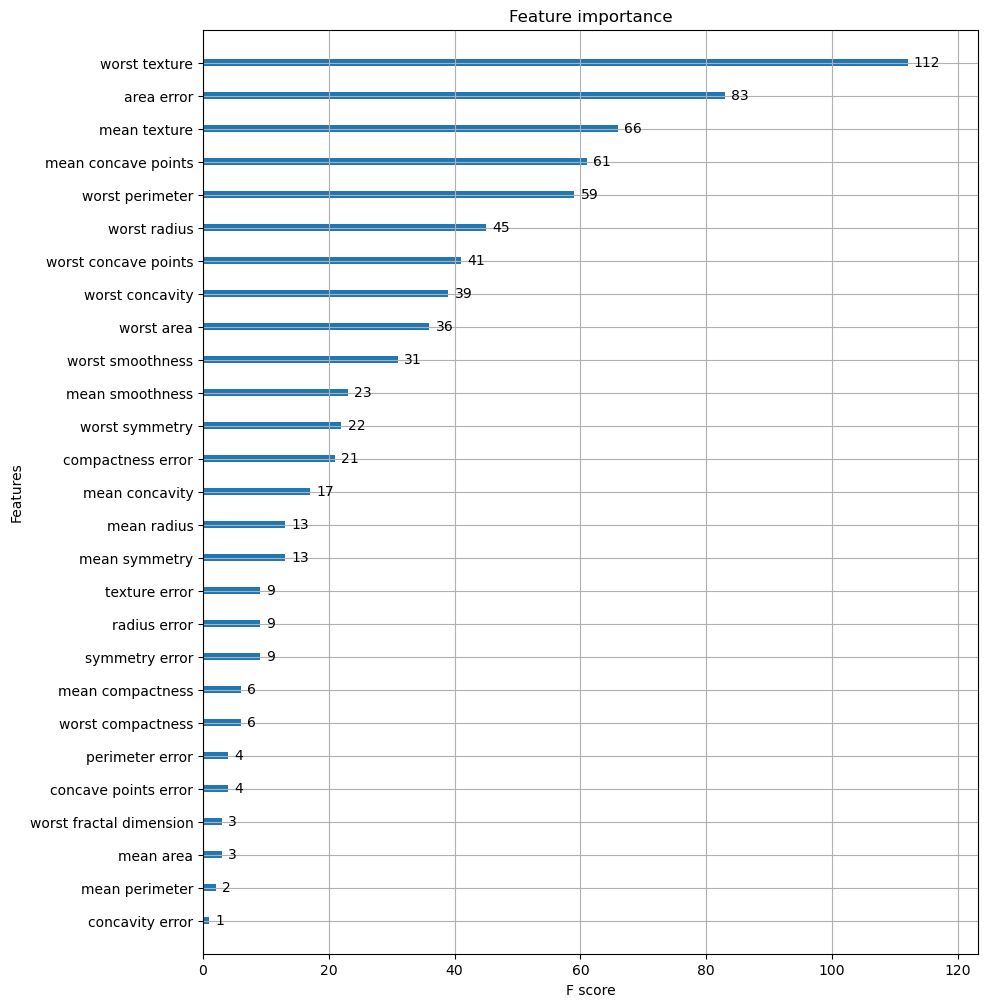

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif',
             dpi=300, bbox_inches='tight')


In [39]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=1000,learning_rate=0.1, max_depth=3)

evals = [(X_val, y_val)]

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100,
                eval_metric = "logloss", eval_set=evals, verbose=50)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


[0]	validation_0-logloss:0.61619
[50]	validation_0-logloss:0.05020
[100]	validation_0-logloss:0.02115
[150]	validation_0-logloss:0.01404
[200]	validation_0-logloss:0.01188
[250]	validation_0-logloss:0.01086
[300]	validation_0-logloss:0.01004
[350]	validation_0-logloss:0.00942
[400]	validation_0-logloss:0.00885
[450]	validation_0-logloss:0.00857
[500]	validation_0-logloss:0.00831
[550]	validation_0-logloss:0.00830
[597]	validation_0-logloss:0.00830


In [54]:
accuracy_score(ws100_preds, y_test)

0.9736842105263158

In [56]:
rf_clf.predict_proba(X_test)

array([[0.37, 0.63],
       [0.96, 0.04],
       [0.33, 0.67],
       [0.58, 0.42],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.12, 0.88],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.59, 0.41],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.17, 0.83],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.41, 0.59],
       [0.83, 0.17],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.67, 0.33],
       [0.01, 0.99],
       [0.62, 0.38],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.21, 0.79],
       [0.94, 0.06],
       [0.  ,

In [55]:
ws100_pred_proba

array([9.5366740e-01, 3.2025124e-03, 8.9323640e-01, 6.6758581e-02,
       9.9298263e-01, 9.9998701e-01, 9.9984455e-01, 9.9945050e-01,
       9.9796933e-01, 4.9869235e-05, 9.6643984e-05, 8.3093095e-05,
       9.9990010e-01, 9.9995375e-01, 9.9933428e-01, 9.9271250e-01,
       9.9576473e-01, 9.9993229e-01, 9.9975103e-01, 9.9972874e-01,
       7.9608447e-04, 6.0213381e-01, 8.5936299e-05, 9.9999011e-01,
       1.4063076e-04, 8.1108606e-01, 2.5942482e-03, 1.2551177e-04,
       9.9966979e-01, 4.2647649e-02, 9.9904436e-01, 1.9328872e-04,
       9.9286228e-01, 8.1495374e-01, 1.8851623e-03, 4.1241925e-05,
       9.9950004e-01, 9.9942493e-01, 3.3259061e-01, 9.9990726e-01,
       2.0420003e-01, 9.9869078e-01, 9.9951839e-01, 9.9981660e-01,
       9.9948907e-01, 9.8595530e-01, 8.5686827e-03, 9.9974221e-01,
       9.9950874e-01, 9.9979335e-01, 9.9921131e-01, 1.6005318e-04,
       9.9956661e-01, 9.9994481e-01, 9.9979180e-01, 9.9944371e-01,
       9.9989831e-01, 9.9340701e-01, 9.9981338e-01, 9.8103106e

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

# 4개의 모델(KNN, RF, Ada, DT)를 통해 개별 예측을 하고 최종으로 Logistic 모델을 사용하여 예측 예정

In [58]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target
X_train , X_test , y_train , y_test = train_test_split(X_data ,y_label , test_size=0.2 , random_state=0)


In [59]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)


In [60]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [61]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)


In [62]:
knn_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1])

In [63]:
rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [64]:
print(f'KNN 정확도: {accuracy_score(y_test, knn_pred):.4f}')
print(f'RF 정확도: {accuracy_score(y_test, rf_pred):.4f}')
print(f'DT 정확도: {accuracy_score(y_test, dt_pred):.4f}')
print(f'Ada 정확도: {accuracy_score(y_test, ada_pred):.4f} ')

KNN 정확도: 0.9211
RF 정확도: 0.9649
DT 정확도: 0.8947
Ada 정확도: 0.9561 


In [65]:
stacked_pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T

print(stacked_pred[:5])
print(stacked_pred.shape)


[[0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 0 1]
 [1 1 1 1]]
(114, 4)


In [66]:
lr_final.fit(stacked_pred, y_test)
final = lr_final.predict(stacked_pred)
print(f'최종 모델의 정확도: {accuracy_score(y_test , final):.4f}')

최종 모델의 정확도: 0.9737


In [69]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [68]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', 
         '선풍기', '믹서', '냉장고']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :', labels)


인코딩 변환값 : [0 1 4 5 3 3 2 1]


In [70]:
encoder = LabelEncoder()
encoder.fit(iris.iloc[:, -1])
labels = encoder.transform(iris.iloc[:, -1])

In [71]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])